In [142]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [143]:
import numpy as np
import pandas as pd

In [144]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [145]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [146]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [147]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [148]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [149]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [150]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [151]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Measurement.__dict__

mappingproxy({'__table__': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.measurement'> at 7f8ab6e37c70>,
              '__init__': <function __init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8ab498f9a0>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8ab6e37f40>,
              'date': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8ab6e38040>,
              'prcp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8ab6e380e0>,
              'tobs': <s

In [152]:
engine.execute('SELECT * FROM measurement limit 20').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0)]

In [153]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

In [154]:
# Perform a query to retrieve the data and precipitation scores
last_year = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > '2016-08-23').all()

In [155]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df = pd.DataFrame(last_year, columns=['Last_year_date','Last_year_prcp'] )
last_year_df.set_index('Last_year_date', inplace=True)

# Sort the dataframe by date
last_year_df.head()


,Last_year_prcp
Last_year_date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

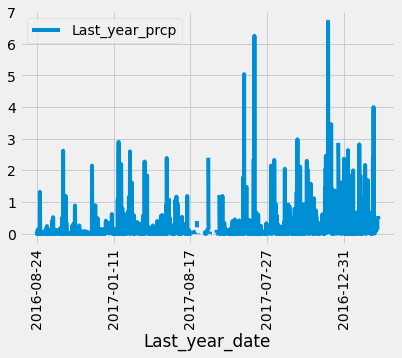

In [156]:
# Use Pandas Plotting with Matplotlib to plot the data
last_year_df.plot(rot= 90)
plt.xlable("Date")
plt.ylable("Inches")
plt.show()

In [157]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_df.describe()

,Last_year_prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [158]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [159]:
Station.__dict__

mappingproxy({'__table__': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.station'> at 7f8ab6e37720>,
              '__init__': <function __init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8ab6e37040>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8ab6e37220>,
              'name': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8ab6e37400>,
              'latitude': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7f8ab6e

In [160]:
# Design a query to show how many stations are available in this dataset?
station_number = session.query(Station.station).count()
print(station_number)

9


# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [161]:
active = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
print(active)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [162]:
Most_Active_Station = active[0][0]

print(f"Station {Most_Active_Station} has the highest number of observations.")

Station USC00519281 has the highest number of observations.


In [163]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

session.query(Measurement.station, func.min(Measurement.tobs)).group_by(Measurement.station).filter(Measurement.station == Most_Active_Station).all()

[('USC00519281', 54.0)]

In [164]:
session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.station == Most_Active_Station).all()

[('USC00519281', 85.0)]

In [165]:
session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station == Most_Active_Station).all()

[('USC00519281', 71.66378066378067)]

In [166]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_active_station = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == Most_Active_Station).\
filter(Measurement.date > '2016-08-23').all()

In [167]:
df = pd.DataFrame(last_year_active_station, columns=['date','temperature'] )
df.set_index('date', inplace=True)

# Sort the dataframe by date
df.head()

,temperature
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

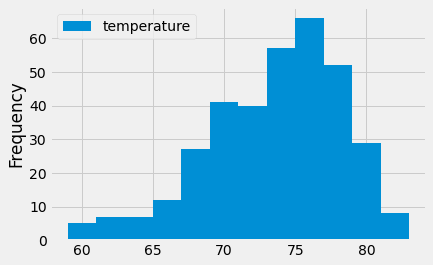

In [169]:
df.plot.hist(bins=12)
plt.xlable("date")
plt.ylable("temperature")
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
